# Аналіз та візуалізація даних

## Опис

Аналіз результатів обстеження пацієнтів щодо можливих серцево-судинних захворювань (ССЗ).

### Стуктура даних

| Параметр                                               | Назва змінної | Тип даних  |
|--------------------------------------------------------|---------------|------------|
| Вік                                                    | age | int (дні) |
| Зріст                                                  | height | int (см) |
| Вага                                                   | weight | float (кг) |
| Стать                                                  | gender | binary :) |
| Систолічний кров’яний тиск                             | ap_hi | int |
| Діастолічний артеріальний тиск                         | ap_lo | int |
| Холестерин                                             | cholesterol | 1: норма, 2: вище норми, 3: сильно вище норми |
| Глюкоза                                                | gluc | 1: норма, 2: вище норми, 3: сильно вище норми |
| Паління                                                | smoke | binary |
| AlcohoПрийом алкоголю                                  | alco | binary |
| Фізична активність                                     | active | binary |
| Наявність або відсутність серцево-судинних захворювань | cardio | binary |

Усі значення набору даних були зібрані на момент медичного огляду.

## Підготовка

In [1]:
%%capture
%pip install pandas seaborn plotly

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline

## Читання даних

In [5]:
df = pd.read_csv("https://gitlab.com/DmyMi/python-training-examples/-/raw/main/tools/data/cardio.csv", sep=";")

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Аналіз даних

**Завдання 1**: Скільки чоловіків і жінок присутні в цьому наборі даних? Значення ознаки `gender` не було надано (не відомо, чи `1` означає жінка чи чоловік), але ми можемо припустити, що чоловіки в середньому вищі за жінок.

In [6]:
df_by_gender = df.groupby('gender')['height'].mean()

df_by_gender

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

Так як 2 > 1, то припускаємо, що 2 -- це чоловіки, а 1 -- жінки

In [7]:
df.gender.value_counts()

1    45530
2    24470
Name: gender, dtype: int64

**Завдання 2**: Яка стать частіше вживає алкоголь - чоловіки чи жінки?

In [8]:
pd.crosstab(index=df['gender'], columns=df["alco"])

alco,0,1
gender,,
1,44369,1161
2,21867,2603


Частіше алкоголь вживають особи 2-ї статі(чоловіки).

**Завдання 3**: Яка різниця між відсотками курців серед чоловіків і жінок (округлено)?

In [9]:
pd.crosstab(index=df['gender'], columns=df["smoke"])

smoke,0,1
gender,,
1,44717,813
2,19114,5356


In [10]:
print(abs(round((813/45530-5356/24470)*100, 2)), '%')

20.1 %


**Завдання 4**: Яка різниця між медіанними значеннями віку для курців і некурців (у місяцях, округлено)? Треба уважно подивитись в чому вимірюється вік (`age`) у цьому наборі даних.

In [11]:
abs(round(((df.age.where(df.smoke == 1).median())-df.age.where(df.smoke == 0).median())/30, 2))

19.9

**Завдання 5**: Створіть нову колонку – ІМТ ([індекс маси тіла](https://uk.wikipedia.org/wiki/%D0%86%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D0%BC%D0%B0%D1%81%D0%B8_%D1%82%D1%96%D0%BB%D0%B0)). Для цього розділіть вагу в кілограмах на квадрат зросту в метрах.

Нормальними значеннями ІМТ вважаються від 18,5 до 25.

Використовуючи цю інформацію, дайте відповіть на питання: Чи правда, що у здорових непитущих чоловіків ІМТ ближче до норми, ніж у здорових непитущих жінок?

> Примітка: Відповідь так чи ні, підкріплена даними :)

In [12]:
df['IMB'] = round(df.weight*10000/(df.height*df.height), 2)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMB
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01


In [13]:
df_ibm_g = round(df.IMB.where(df.gender == 1).where(df.alco == 0).mean(), 2)
df_ibm_d = round(df.IMB.where(df.gender == 2).where(df.alco == 0).mean(), 2)
print('Середнє значення ІМТ для непитущих жінок:', df_ibm_g)
print('Середнє значення ІМТ для непитущих чоловіків:', df_ibm_d)

Середнє значення ІМТ для непитущих жінок: 27.94
Середнє значення ІМТ для непитущих чоловіків: 26.71


Так, у здорових непитущих чоловіків ІМТ ближче до норми:)

## Візуалізація даних

> Можна використовувати або Seaborn або Plotly на ваш вибір.

**Завдання 6**: З нашого попереднього дослідження ми знаємо, що стать кодується значеннями `1` і `2`. Давайте підтвердимо наше попереднє визначення статі графічно, подивившись на середні значення зросту та ваги для кожного значення `gender`.

Створіть *violin plot* за зростом і статтю ([seaborn](https://seaborn.pydata.org/generated/seaborn.violinplot.html)/[plotly](https://plotly.com/python/violin/)).
Для Seaborn можна икористати параметр `hue` для розділення за статтю.

In order for the plot to render correctly, you need to convert your `DataFrame` to *long* format using the `melt()` function from `pandas`. Here is [an example](https://stackoverflow.com/a/41575149/3338479) of this for your reference.

> Щоб графік відтворювався правильно, можливо треба буде перетворити `DataFrame` у *довгий* формат за допомогою функції `melt()`. [Приклад](https://stackoverflow.com/a/41575149/3338479) для довідки.

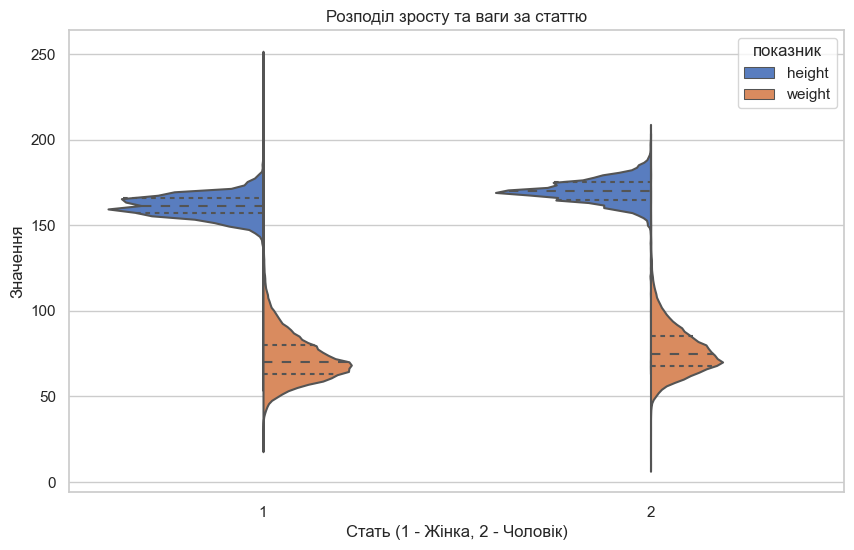

In [14]:
df_to_show = pd.melt(df, id_vars=['gender'], value_vars=['height', 'weight'], var_name='показник', value_name='значення')

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x="gender", y="значення", hue="показник", data=df_to_show, split=True, inner="quart", palette="muted")
plt.title("Розподіл зросту та ваги за статтю")
plt.xlabel("Стать (1 - Жінка, 2 - Чоловік)")
plt.ylabel("Значення")
plt.show()

**Завдання 7**: Створіть *count plot* ([seaborn](http://seaborn.pydata.org/generated/seaborn.countplot.html)/[plotly](https://plotly.com/python/histograms/)) із віком на осі `x` і кількістю людей на осі `y`. Ваш результуючий графік повинен мати два стовпці для кожного віку, що відповідає кількості людей для кожного значення `cardio` для цього віку.

Дайте відповідь на питання: Який найменший вік, коли кількість людей із ССЗ перевищує кількість людей без ССЗ?

In [15]:
df['age_in_years'] = (df['age'] / 365).astype(int)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMB,age_in_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,47


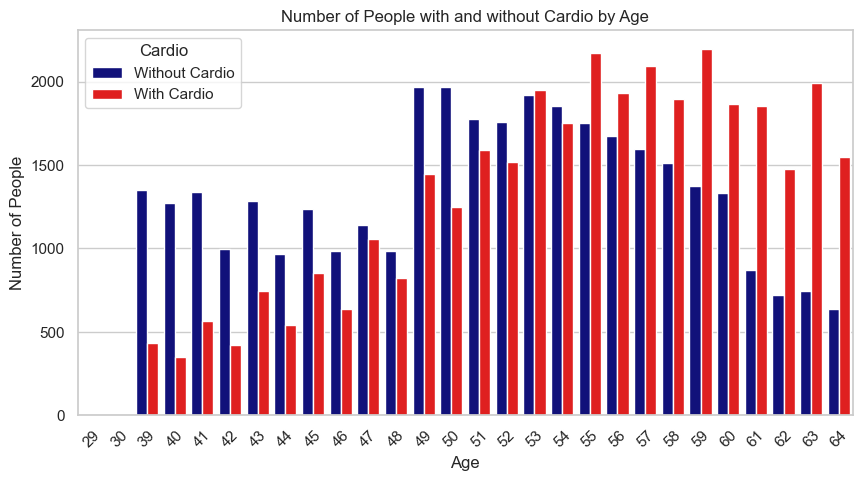

In [16]:
custom_palette = {0: "darkblue", 1: "red"}

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.countplot(x='age_in_years', hue="cardio", data=df, palette=custom_palette)
plt.title("Number of People with and without Cardio by Age")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.legend(title="Cardio", labels=["Without Cardio", "With Cardio"])
plt.xticks(rotation=45)
plt.show()

In [17]:
age_counts = df.groupby(['age_in_years', 'cardio']).size().unstack(fill_value=0)
age_counts['CVD_Difference'] = age_counts[1] - age_counts[0]
lowest_age_with_more_CVD = age_counts[age_counts['CVD_Difference'] > 0].index.min()
print("The lowest age when the number of people with CVD exceeds the number of people without CVD:", lowest_age_with_more_CVD)

The lowest age when the number of people with CVD exceeds the number of people without CVD: 53
